In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())


C:\Users\19452\AppData\Local\Temp\ipykernel_6688\3793195535.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/19452/Downloads/Air_line_Delay_Cause.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   year                 45585 non-null    float64
 1   month                45585 non-null    float64
 2   carrier              45585 non-null    object 
 3   carrier_name         45585 non-null    object 
 4   airport              45585 non-null    object 
 5   airport_name         45585 non-null    object 
 6   arr_flights          45521 non-null    float64
 7   arr_del15            45498 non-null    float64
 8   carrier_ct           45521 non-null    float64
 9   weather_ct           45521 non-null    float64
 10  nas_ct               45521 non-null    float64
 11  security_ct          45521 non-null    float64
 12  late_aircraft_ct     45521 non-null    float64
 13  arr_cancelled        45521 non-null    float64
 14  arr_diverted         45521 non-null    float64
 15

In [3]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill missing values (if any) with zero or mean (depending on the feature)
df.fillna(0, inplace=True)

# Feature engineering: Extract additional information if needed (like seasonality)
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                 else 'Spring' if x in [3, 4, 5] 
                                 else 'Summer' if x in [6, 7, 8] 
                                 else 'Fall')
df['season'] = label_encoder.fit_transform(df['season'])


In [4]:
# Define features (X) and target (y)
features = ['carrier', 'arr_flights', 'arr_del15', 
            'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = df[features]
y = df['arr_cancelled']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:


# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9752425911355888
Confusion Matrix (Random Forest):
[[204223    262     87 ...      0      0      0]
 [  1085    187     64 ...      0      0      0]
 [   532    118     59 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]]
Classification Report (Random Forest):


C:\Users\19452\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    204649
         1.0       0.21      0.13      0.16      1429
         2.0       0.13      0.07      0.09       806
         3.0       0.05      0.02      0.03       546
         4.0       0.04      0.02      0.03       366
         5.0       0.07      0.03      0.04       264
         6.0       0.04      0.01      0.02       214
         7.0       0.02      0.01      0.01       145
         8.0       0.08      0.03      0.05       125
         9.0       0.07      0.03      0.04       101
        10.0       0.03      0.02      0.03        84
        11.0       0.05      0.03      0.04        61
        12.0       0.03      0.02      0.02        56
        13.0       0.09      0.05      0.06        66
        14.0       0.11      0.03      0.05        60
        15.0       0.05      0.02      0.03        41
        16.0       0.00      0.00      0.00        40
        17.0       0.00    

C:\Users\19452\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\metrics\_cla

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train-test split with stratification to ensure label balance
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=42, stratify=y
#)

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model with zero_division parameter in classification report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


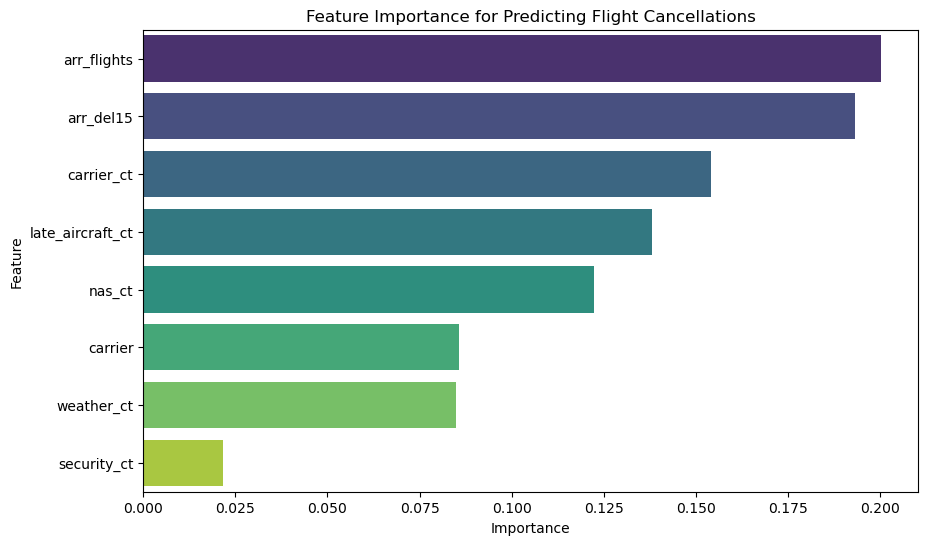

In [6]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance for Predicting Flight Cancellations")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


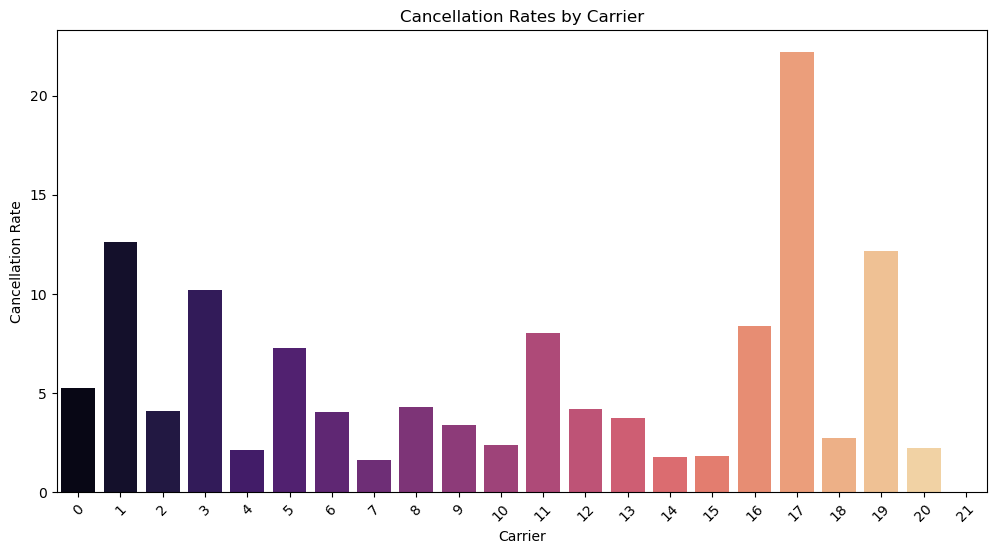

In [8]:
# Group by carrier and calculate cancellation rates
carrier_cancellations = df.groupby('carrier')['arr_cancelled'].mean().reset_index()
carrier_cancellations = carrier_cancellations.sort_values(by='arr_cancelled', ascending=False)

# Plot cancellation rates by carrier
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier', y='arr_cancelled', data=carrier_cancellations, palette='magma')
plt.title("Cancellation Rates by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.show()


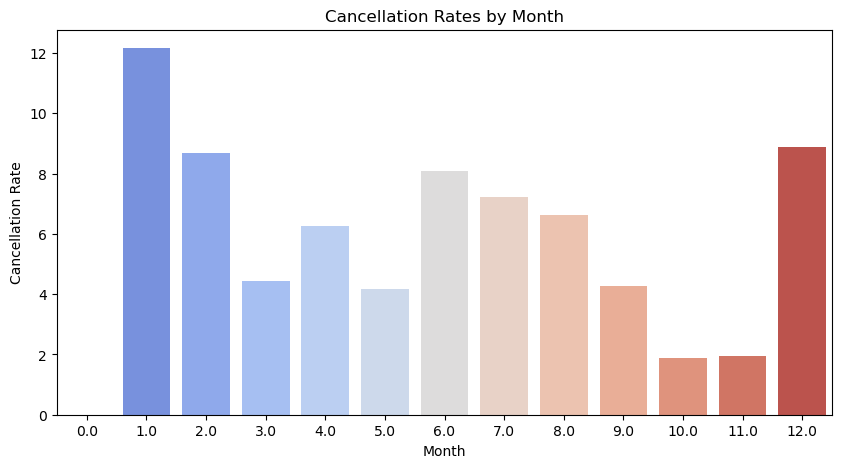

In [9]:
# Group by month and calculate cancellation rates
monthly_cancellations = df.groupby('month')['arr_cancelled'].mean().reset_index()

# Plot cancellation rates by month
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='arr_cancelled', data=monthly_cancellations, palette='coolwarm')
plt.title("Cancellation Rates by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.show()
